In [1]:
import numpy as np
import pandas as pd
from predictor import Predictor
from reshaper import Reshaper
from reshaper import save_obj

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

In [4]:
semantic = {
    "Weight": 0,
    "Height": 1,
    "MID_NECK_GTH": 2,
    "BUST_CHEST_GTH": 3,
    "BELLY_CIRC": 4,
    "MIDDLE_HIP": 5,
    "ARM_LTH_T_NECK_L": 6,
    "INSEAM_L": 7,
    "CR_SHOULDER": 8,
    "DIST_NECK_T_HIP": 9,
    "WAIST_GTH": 10,
    "HIP_GTH": 11,
    "WAIST_HT": 12,
    "ARM_LTH_L": 13,
    "UP_ARM_GTH_L": 14,
    "WRIST_GTH": 15,
    "BREAST_HT": 16,
    "KNEE_GTH_L": 17,
    "WTH_THIGH_SUM": 18,
    "Age": 19
}



# Raw data analysis

In [5]:
pred = Predictor(age=19, weight=70.8, height=168.2)

In [6]:
over_time = []
for i in np.arange(19,81):
     over_time.append(np.append(pred.predict_next(denormalize=True), i))

In [7]:
# data = np.load("./processed_data/life_selected.npy")
data = pd.read_csv("./processed_data/life_body_measure.csv", delimiter=",", decimal=",")
data = data[semantic.keys()]
data = pd.DataFrame(data.to_numpy())

In [8]:
over_time_better = []
over_time_errors = []

for element in over_time:
    temp_data = data.copy()
    age = element[-1]
    temp_data = temp_data[temp_data[19] == age]
    
    if temp_data.empty:
        over_time_errors.append(np.nan)
        over_time_better.append(np.full(19,np.nan))
    else:
        error = np.sqrt(((temp_data - element)**2).sum(axis=1))
        error.reset_index(drop=True, inplace=True)
        better = np.argmin(error)
        over_time_errors.append(error.iloc[better])
        over_time_better.append(temp_data.iloc[better])

In [9]:
over_time_plot = np.array(over_time)
over_time_better_plot = np.array(over_time_better)
over_time_errors_plot = np.array(over_time_errors)
age_to_plot = over_time_plot[:,-1]

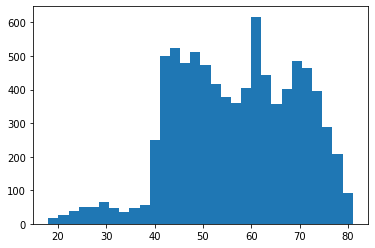

In [10]:
plt.hist(data[19], bins=30)
plt.show()

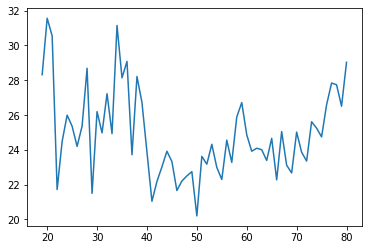

In [11]:
plt.plot(age_to_plot, over_time_errors_plot)

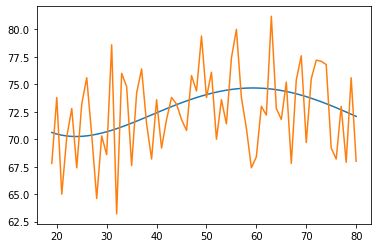

In [12]:
plt.plot(age_to_plot, over_time_plot[:,0])
plt.plot(age_to_plot, over_time_better_plot[:,0])

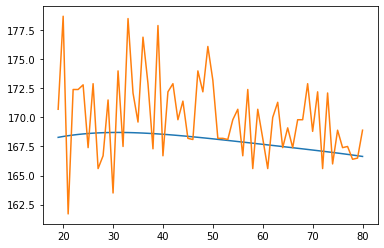

In [13]:
plt.plot(age_to_plot, over_time_plot[:,1])
plt.plot(age_to_plot, over_time_better_plot[:,1])

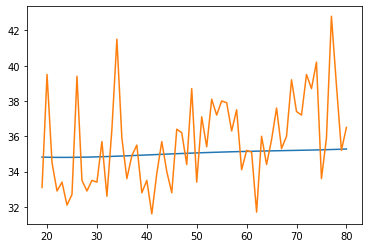

In [14]:
plt.plot(age_to_plot, over_time_plot[:,2])
plt.plot(age_to_plot, over_time_better_plot[:,2])

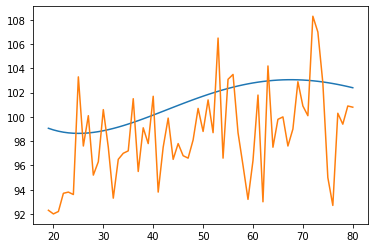

In [15]:
plt.plot(age_to_plot, over_time_plot[:,3])
plt.plot(age_to_plot, over_time_better_plot[:,3])

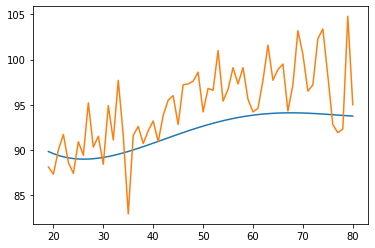

In [16]:
plt.plot(age_to_plot, over_time_plot[:,4])
plt.plot(age_to_plot, over_time_better_plot[:,4])

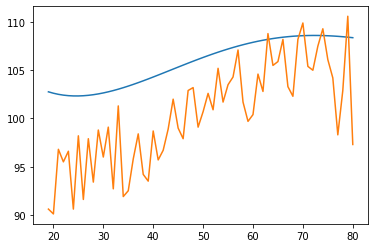

In [17]:
plt.plot(age_to_plot, over_time_plot[:,5])
plt.plot(age_to_plot, over_time_better_plot[:,5])

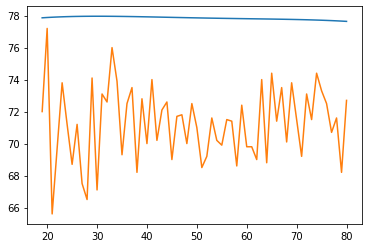

In [18]:
plt.plot(age_to_plot, over_time_plot[:,6])
plt.plot(age_to_plot, over_time_better_plot[:,6])

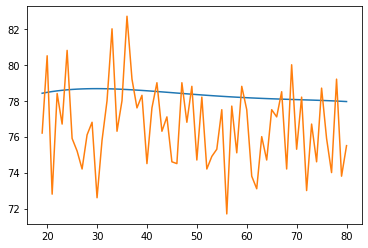

In [19]:
plt.plot(age_to_plot, over_time_plot[:,7])
plt.plot(age_to_plot, over_time_better_plot[:,7])

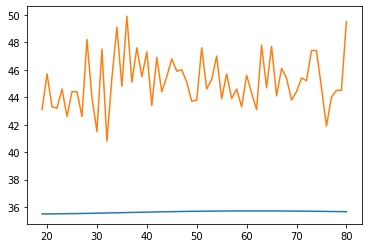

In [20]:
plt.plot(age_to_plot, over_time_plot[:,8])
plt.plot(age_to_plot, over_time_better_plot[:,8])

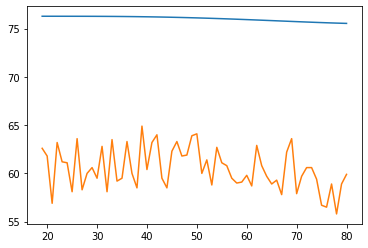

In [21]:
plt.plot(age_to_plot, over_time_plot[:,9])
plt.plot(age_to_plot, over_time_better_plot[:,9])

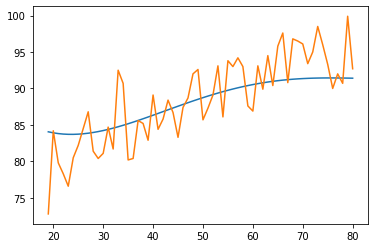

In [22]:
plt.plot(age_to_plot, over_time_plot[:,10])
plt.plot(age_to_plot, over_time_better_plot[:,10])

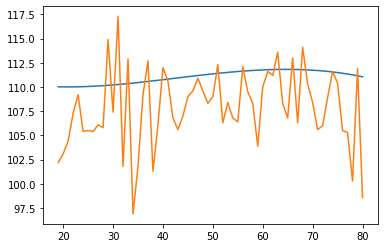

In [23]:
plt.plot(age_to_plot, over_time_plot[:,11])
plt.plot(age_to_plot, over_time_better_plot[:,11])

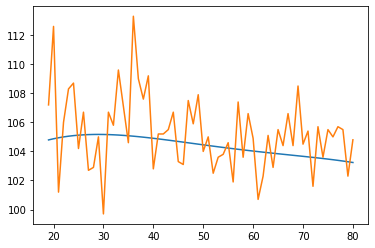

In [24]:
plt.plot(age_to_plot, over_time_plot[:,12])
plt.plot(age_to_plot, over_time_better_plot[:,12])

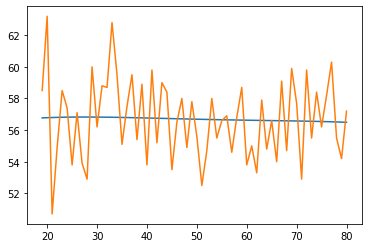

In [25]:
plt.plot(age_to_plot, over_time_plot[:,13])
plt.plot(age_to_plot, over_time_better_plot[:,13])

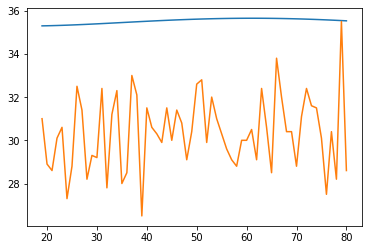

In [26]:
plt.plot(age_to_plot, over_time_plot[:,14])
plt.plot(age_to_plot, over_time_better_plot[:,14])

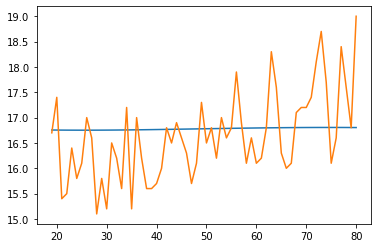

In [27]:
plt.plot(age_to_plot, over_time_plot[:,15])
plt.plot(age_to_plot, over_time_better_plot[:,15])

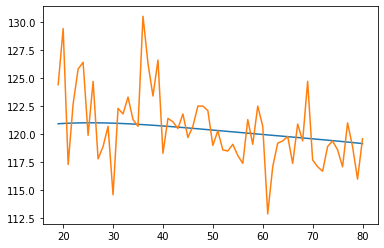

In [28]:
plt.plot(age_to_plot, over_time_plot[:,16])
plt.plot(age_to_plot, over_time_better_plot[:,16])

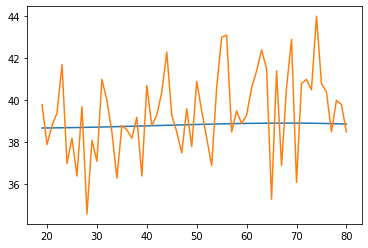

In [29]:
plt.plot(age_to_plot, over_time_plot[:,17])
plt.plot(age_to_plot, over_time_better_plot[:,17])

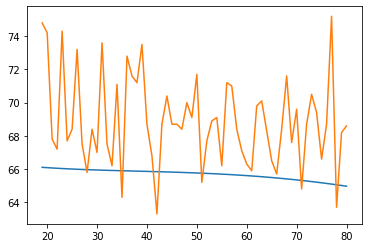

In [30]:
plt.plot(age_to_plot, over_time_plot[:,18])
plt.plot(age_to_plot, over_time_better_plot[:,18])

# 3D body analysis

In [31]:
from pygel3d import jupyter_display as jd
from pygel3d import hmesh

In [32]:
pred = Predictor(age=40, weight=70.450161, height=172.375510)
resh = Reshaper()
print(pred.current_measures)

[[ 1.14977643e-01  1.29894982e+00  1.85641472e-15  4.26975387e-16
   2.41333914e-16  7.98258331e-16  8.72514920e-16  9.97822914e-16
  -1.59651666e-15  1.41087519e-15  4.26975387e-16  9.28207362e-17
   2.02349205e-15  1.89354302e-15 -8.91079068e-16  1.33661860e-15
  -8.53950773e-16  6.03334785e-16 -2.41333914e-16]]


In [33]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test1.obj",v,f,n)

obj file test1.obj saved


In [34]:
data = np.load("./processed_data/measures_with_age.npy")
data = pd.DataFrame(data)

In [35]:
pred = Predictor(age=40, weight=70.450161, height=172.375510)
measures= pred.normalized_measure[:,1026]
measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)


[ 1.14601765e-10 -9.78918449e-02  1.50653957e-01  1.55584002e-01
  9.41352073e-02  6.87828669e-02 -8.56154464e-02 -1.90897499e-01
 -4.17118195e-03 -7.99308428e-02  1.36770141e-01 -6.77569605e-04
 -1.84177444e-02 -1.78494861e-01  3.45135625e-02  1.29391968e-01
 -8.43634167e-02 -6.19476599e-02 -5.05338298e-02]


In [36]:
v, n, f = resh.build_body(measures)
save_obj("test2.obj",v,f,n)

obj file test2.obj saved


In [37]:
data = np.load("./processed_data/life_selected.npy")
data = pd.DataFrame(data)

In [38]:
measures = data.iloc[1904].copy().to_numpy()[:-1]
measures -= pred.mean_measure.flatten()
measures /= pred.std_measure.flatten()

measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)

[-1.92478080e-06 -2.07072232e+00 -1.07808237e+00 -7.12735594e-01
 -5.97154559e-01 -6.56562254e-01 -1.87481930e+00 -1.50435855e+00
 -1.35942097e+00 -1.54518426e+00 -5.86397792e-01 -8.64001808e-01
 -9.85381939e-01 -1.70855985e+00 -6.37909869e-01 -1.15994730e+00
 -1.84629621e+00 -1.02248690e+00 -7.55686484e-01]


In [39]:
v, n, f = resh.build_body(measures)
save_obj("test3.obj",v,f,n)

obj file test3.obj saved


In [40]:
pred = Predictor(age=40, weight=70, height=145)
resh = Reshaper()
print(pred.current_measures)

[[ 8.77068401e-02 -2.57556048e+00  1.85641472e-15  4.26975387e-16
   2.41333914e-16  7.98258331e-16  8.72514920e-16  9.97822914e-16
  -1.59651666e-15  1.41087519e-15  4.26975387e-16  9.28207362e-17
   2.02349205e-15  1.89354302e-15 -8.91079068e-16  1.33661860e-15
  -8.53950773e-16  6.03334785e-16 -2.41333914e-16]]


In [41]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test4.obj",v,f,n)

obj file test4.obj saved


In [42]:
pred = Predictor(age=40, weight=70, height=210)
resh = Reshaper()
print(pred.current_measures)

[[ 8.77068401e-02  6.62401862e+00  1.85641472e-15  4.26975387e-16
   2.41333914e-16  7.98258331e-16  8.72514920e-16  9.97822914e-16
  -1.59651666e-15  1.41087519e-15  4.26975387e-16  9.28207362e-17
   2.02349205e-15  1.89354302e-15 -8.91079068e-16  1.33661860e-15
  -8.53950773e-16  6.03334785e-16 -2.41333914e-16]]


In [43]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test5.obj",v,f,n)

obj file test5.obj saved
